In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.30)

In [1]:
%pip install catboost
from catboost import CatBoostClassifier

Note: you may need to restart the kernel to use updated packages.


### Model Tahmin

In [4]:
cb_model=CatBoostClassifier().fit(X_train,y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 159ms	remaining: 2m 38s
1:	learn: 0.6843414	total: 163ms	remaining: 1m 21s
2:	learn: 0.6805760	total: 168ms	remaining: 55.9s
3:	learn: 0.6765782	total: 173ms	remaining: 43.1s
4:	learn: 0.6720829	total: 177ms	remaining: 35.3s
5:	learn: 0.6681617	total: 180ms	remaining: 29.8s
6:	learn: 0.6641912	total: 184ms	remaining: 26.1s
7:	learn: 0.6602881	total: 187ms	remaining: 23.2s
8:	learn: 0.6562626	total: 191ms	remaining: 21s
9:	learn: 0.6528483	total: 194ms	remaining: 19.2s
10:	learn: 0.6487823	total: 197ms	remaining: 17.8s
11:	learn: 0.6454980	total: 206ms	remaining: 16.9s
12:	learn: 0.6418953	total: 211ms	remaining: 16s
13:	learn: 0.6374431	total: 220ms	remaining: 15.5s
14:	learn: 0.6339676	total: 225ms	remaining: 14.7s
15:	learn: 0.6304252	total: 228ms	remaining: 14s
16:	learn: 0.6266998	total: 236ms	remaining: 13.7s
17:	learn: 0.6237660	total: 246ms	remaining: 13.4s
18:	learn: 0.6204394	total: 250ms	remaining: 12.9s
19:	learn: 0.6170

In [5]:
?cb_model

Type:           CatBoostClassifier
String form:    <catboost.core.CatBoostClassifier object at 0x000001FF03F98DF0>
File:           c:\users\sevva\anaconda3\lib\site-packages\catboost\core.py
Docstring:     
Implementation of the scikit-learn API for CatBoost classification.

Parameters
----------
iterations : int, [default=500]
    Max count of trees.
    range: [1,+inf]
learning_rate : float, [default value is selected automatically for binary classification with other parameters set to default. In all other cases default is 0.03]
    Step size shrinkage used in update to prevents overfitting.
    range: (0,1]
depth : int, [default=6]
    Depth of a tree. All trees are the same depth.
    range: [1,+inf]
l2_leaf_reg : float, [default=3.0]
    Coefficient at the L2 regularization term of the cost function.
    range: [0,+inf]
model_size_reg : float, [default=None]
    Model size regularization coefficient.
    range: [0,+inf]
rsm : float, [default=None]
    Subsample ratio of columns w

In [6]:
y_pred=cb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

### Model Tuning

In [7]:
cb=CatBoostClassifier()

In [8]:
cb_params={"iterations":[200,500,1000],"learning_rate":[0.1,0.01,0.001],"depth":[4,5,8]}

In [9]:
catb_cv=GridSearchCV(cb,cb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train,verbose=False)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [10]:
catb_cv.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [11]:
catb_tuned=CatBoostClassifier(iterations=200,learning_rate=0.01,depth=8).fit(X_train,y_train,verbose=False)

In [12]:
y_pred=catb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

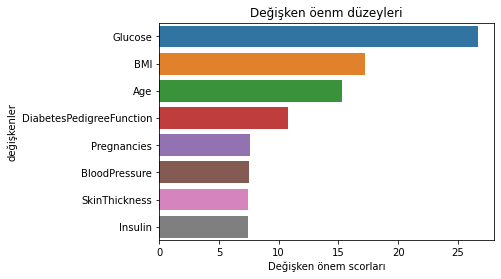

In [13]:
feature_imp=pd.Series(catb_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)

import seaborn as sns
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken önem scorları")
plt.ylabel("değişkenler")
plt.title("Değişken öenm düzeyleri")
plt.show()